In [1]:

from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym


# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterFull"]
mycol = mydb["s_m_a_r_t_att_full"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "u_errors":1, "n_b_written":1, "_id":0}

mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# %%
dfSMARTAtt["model_y"] = "B2"

# %%
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [3]:
result.w_r_d.max()

7206.0

In [4]:
# REMOVE ZERO VALUES AS THEY ARE AFFECTING THE KDE RESULTS

result.drop(result[result.w_r_d < 10].index, inplace=True)
result.drop(result[result.w_r_d > 7206].index, inplace=True)

In [6]:
result.drop(result[result.w_r_d > 3000].index, inplace=True)

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

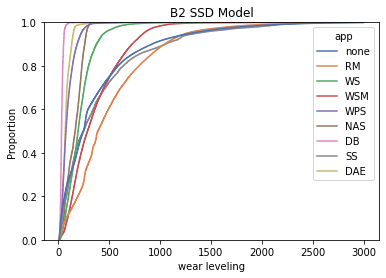

In [7]:
graph = sns.ecdfplot(x = "w_r_d", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", title ='B2 SSD Model')

In [ ]:
result.drop(result[result.r_errors < 10].index, inplace=True)

[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

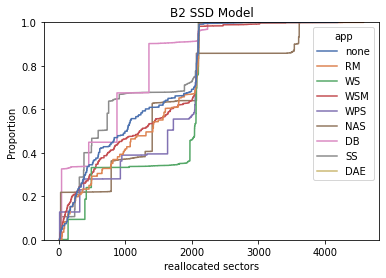

In [11]:
# removing < 10

graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

In [10]:
result.loc[result["app"] == "WS", "u_errors"].max()

181185.0

In [4]:
result.drop(result[result.u_errors < 1].index, inplace=True)

[Text(0.5, 0, 'Uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

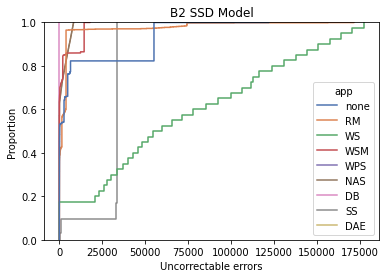

In [14]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

graph = sns.ecdfplot(x = "u_errors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Uncorrectable errors", title ='B2 SSD Model')

In [18]:
result.loc[result["app"] == "DB", "p_failedB"].max()

2095.0

In [5]:
result.drop(result[result.p_failedB < 1].index, inplace=True)
result.drop(result[result.p_failedB >2103].index, inplace=True)

[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

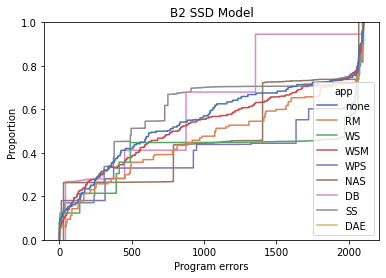

In [16]:
graph = sns.ecdfplot(x = "p_failedB", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

In [2]:
maxW = result.n_b_written.max()

In [3]:
result.drop(result[result.n_b_written < 1].index, inplace=True)
result.drop(result[result.n_b_written > maxW].index, inplace=True)

In [9]:
result.drop(result[result.n_b_written > 5992942384941].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

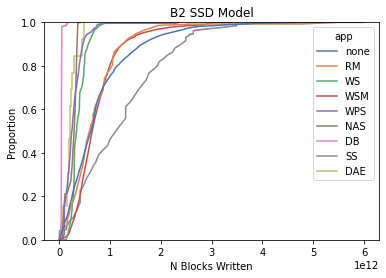

In [10]:
graph = sns.ecdfplot(x = "n_b_written", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

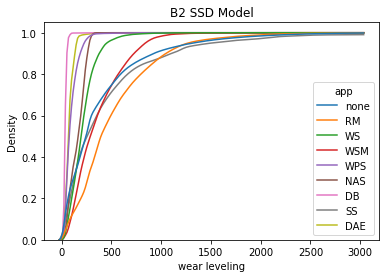

In [8]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

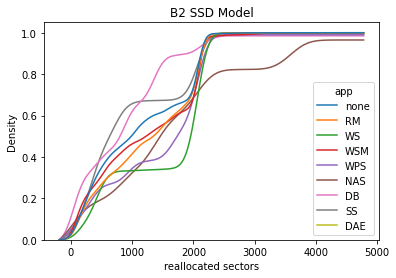

In [13]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

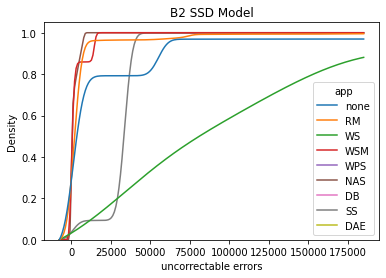

In [15]:
graph = sns.kdeplot(
    data=result, x="u_errors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "uncorrectable errors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

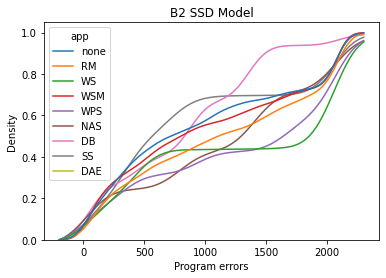

In [19]:
graph = sns.kdeplot(
    data=result, x="p_failedB", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

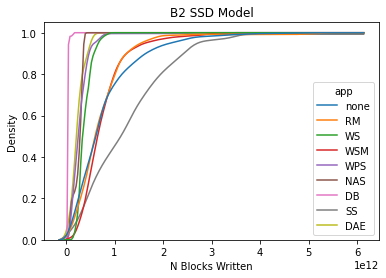

In [11]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

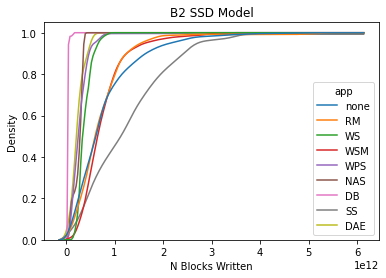

In [7]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

### APPROACH USING GROUPY BASED ON TIMESTAMP

N Blocks written x Program Errors

In [5]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['p_failedB', 'n_b_written'].mean()

/tmp/ipykernel_72241/989673082.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['p_failedB', 'n_b_written'].mean()


[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Program errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

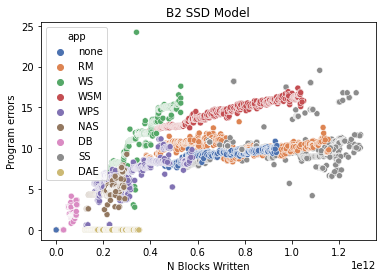

In [9]:
graph = sns.scatterplot(x = "n_b_written", y = 'p_failedB', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

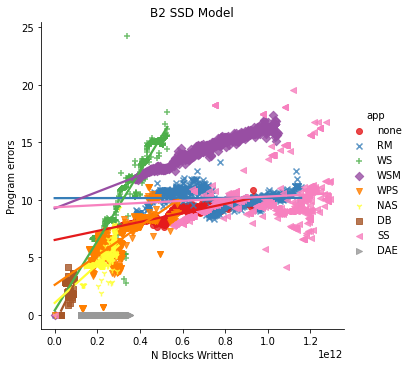

In [11]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

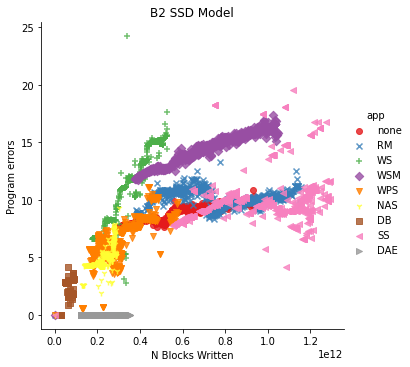

In [12]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

N Blocks written x Wear Leveling

In [3]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'w_r_d'].mean()

/tmp/ipykernel_73803/3156792228.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'w_r_d'].mean()


[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Wear Leveling Count'),
 Text(0.5, 1.0, 'B2 SSD Model')]

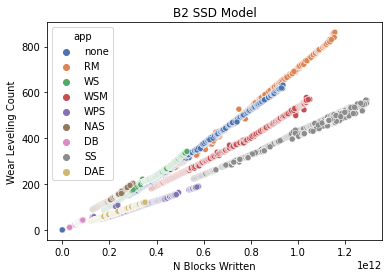

In [4]:
graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

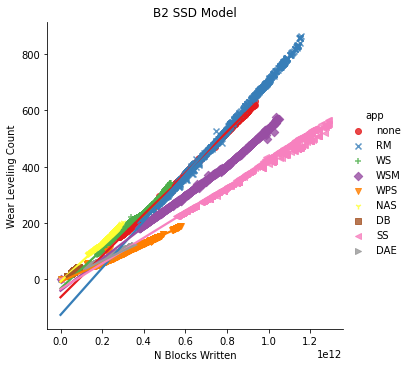

In [5]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

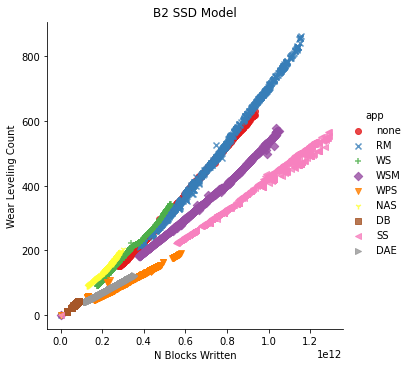

In [6]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

N Blocks written x Reallocated sector

In [2]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'r_sectors'].mean()

/tmp/ipykernel_74313/3296507595.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'r_sectors'].mean()


In [6]:
group.drop(group[group.r_errors < 10].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Reallocated Sectors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

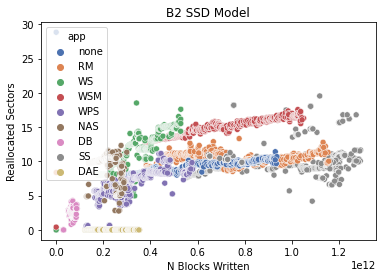

In [7]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

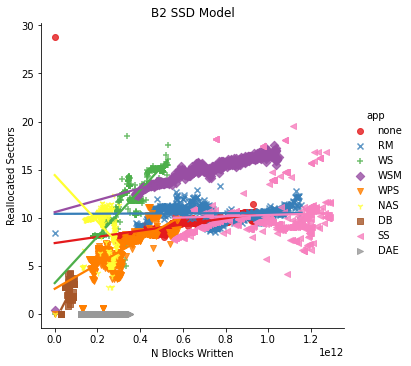

In [8]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

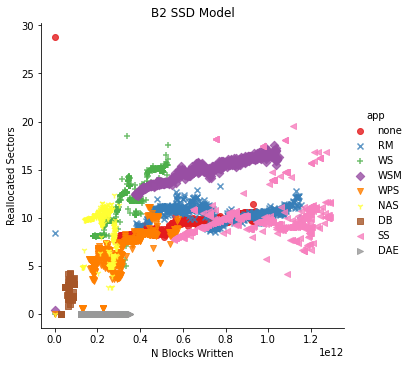

In [9]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

N Blocks written x Uncorrectable Bit Error Rate

In [2]:
result.drop(result[result.u_errors < 1].index, inplace=True)

In [3]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

In [4]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors'].mean()

/tmp/ipykernel_75244/1095973025.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors'].mean()


[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Uncorrectable Errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

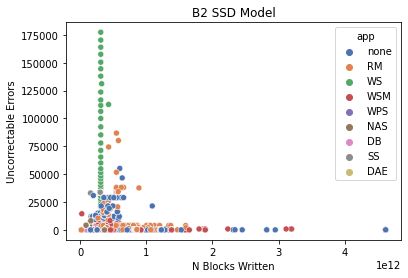

In [5]:
graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Errors", title ='B2 SSD Model')

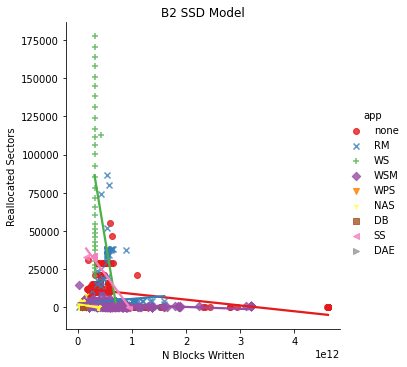

In [6]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

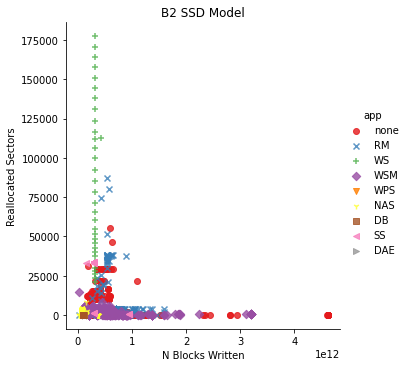

In [7]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')